# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import pwca
from pwca import determine_data_fitting_region,pwca_catalog,metadata_dict

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"


## This is notebook is only for scratch code and prototyping

In [153]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
model_domain = array( [ u, eta, chi_eff, chi_p ] ).T
# model_domain = array( [ u, eta, u*a1, v*a1 ] ).T

# Load and unpuack physical parameter space -- dphi
dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
nu4,nu5,nu6 = dphi_range.T

# Load and unpuack physical parameter space -- amp
amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
mu1, mu2, mu3, mu4 = amp_range.T

# labels={'python':['nu4',('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':['nu4',(r'u', r'\eta', r'\chi_s', r'\chi_p'),'']}

In [154]:
# ??calc_chi_p

In [155]:
# Given m1,m2,X = X1+X2 and L

# S = M**2 * X

'''

If L || z and m1>m2 and q=m1/m2, then 

S2 = 0
S1 = m1**2 a1 * exp( 1j * theta ) = Sz + 1j*Sperp
X1 = X = S1/m1**2

chi_eff = m1*a1*cos(theta)/(m1+m2) = a1*cos(theta)*/(1+1.0/q)

A1 = 2 + (3*m2)/(2*m1)
A2 = 2 + (3*m1)/(2*m2)
B1 = A1 * a1*sin(theta)
B2 = 0
chi_p = max( B1,B2 ) / ( A1 * m1*m1 )
L = L

'''

#
def parama_party( eta,theta,a1 ):
    '''
    PARAMA-PARTY:
    If L || z and m1>m2 and q=m1/m2, then 

    S2 = 0
    S1 = m1**2 a1 * exp( 1j * theta ) = Sz + 1j*Sperp
    X1 = X = S1/m1**2

    chi_eff = m1*a1*cos(theta)/(m1+m2) = a1*cos(theta)*/(1+1.0/q)

    A1 = 2 + (3*m2)/(2*m1)
    A2 = 2 + (3*m1)/(2*m2)
    B1 = A1 * a1*sin(theta)
    B2 = 0
    chi_p = max( B1,B2 ) / ( A1 * m1*m1 )
    L = L

    '''
    
    #
    m1,m2 = eta2m1m2(eta)
    
    #
    q = m1/m2
    chi_eff = a1*cos(theta)/(1+1.0/q)
    
    #
    A1 = 2 + (3.0*m2)/(2.0*m1)
    A2 = 2 + (3.0*m1)/(2.0*m2)
    B1 = A1 * a1*sin(theta)
    chi_p = maximum( B1,0 ) / ( A1 * m1*m1 )
    
    #
    return chi_eff, chi_p
    
    

# 
# cos(theta) = dot( s,l )

In [156]:
a1_set = array(sort(list( set(around(a1,2)) )))
print 'a1 >>\t\t',a1_set

theta_set = array(sort(list( set((theta*180/pi).astype(int)) )))*pi/180
print 'th >>\t\t',theta_set

q_set = array(sort(list( set(around(array([eta2q(n) for n in eta]),2)) )))
print 'q >>\t\t',q_set

eta_set = q2eta(q_set)
print 'eta >>\t\t',eta_set

a1 >>		[0.4 0.8]
th >>		[0.52359878 1.04719755 1.57079633 2.0943951  2.61799388]
q >>		[1. 2. 4. 8.]
eta >>		[0.25       0.22222222 0.16       0.09876543]


(gmvpfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is ['K' '2' '1']
&& The current estimator value is 0.841087

(gmvpfit)>> Now working deg = 2
&& The estimator has changed by -0.103895
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '23' '2' '11' '1' '03' '02' '01' '00']
&& The current estimator value is 0.737192

(gmvpfit)>> Now working deg = 3
&& The estimator has changed by -0.016679
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '12' '112' '11' '1' '023' '012' '01' '003' '002' '0']
&& The current estimator value is 0.720513

(gmvpfit)>> Now working deg = 4
&& The estimator has changed by -0.196944
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '11' '1' '023' '02' '0123' '012' '0113' '0112' '01' '003' '0023'
 '002' '0013' '0011' '001' '00']
&& The current estimator value is 0.523568

(gmvpfit)>> Now working deg = 5
&& The estimator has 

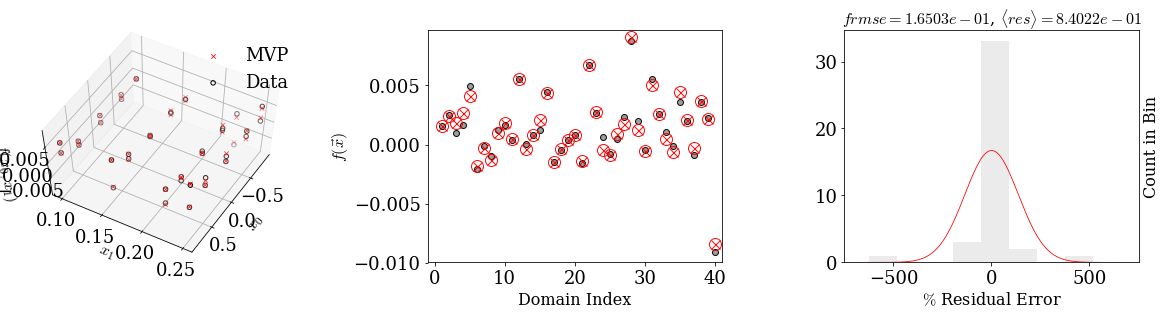

In [170]:
# # nu4
# # ---
# foo = gmvpfit( model_domain, nu4,fitatol=0.005,verbose=True,maxdeg_list=[2,3,1,2],center=True)
# foo.plot(); show();

# # nu5
# # ---
# foo = gmvpfit( model_domain, nu5,fitatol=0.002,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

# # nu6
# # ---
# foo = gmvpfit( model_domain, nu6,fitatol=0.002,verbose=True,maxdeg_list=[2,2,2,1],center=True)
# foo.plot(); show();

# # mu1 
# # ---
# # possibly overfit
# foo = gmvpfit( model_domain, mu1,fitatol=0.002,verbose=True,maxdeg_list=[2,2,1,1],center=True)
# foo.plot(); show();

# # mu2
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu2,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

# # mu3
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu3,fitatol=0.001,verbose=True,maxdeg_list=[2,2,2,2],center=True,temper=True)
# foo.plot(); show();

# # mu4
# # ---
# # not overfit
# foo = gmvpfit( model_domain, mu4,fitatol=0.004,verbose=True,maxdeg_list=[2,2,2,2],center=True)
# foo.plot(); show();

In [112]:

datadir = '/Users/book/KOALA/puck/ll/data/version2/'
foo_path = datadir+'parameter_space_fits.pickle'
foo = pickle.load( open( foo_path, "rb" ) )


0
0.5235987755982988
[-4.09405222e-03  8.64685540e-01  4.98651957e-01 -5.02834548e-01
  4.99898697e-01  8.65135087e-01 -5.03935224e-01 -8.66934869e-01
  4.97292939e-01  8.65774354e-01  4.95976079e-01  8.63349692e-01
 -5.05480832e-01 -5.32614153e-03 -8.66451870e-01  8.65186888e-01
 -1.08195216e-02 -8.67311477e-01 -6.92657680e-03 -3.42671080e-03
 -5.07731533e-01  8.64344396e-01  4.94646904e-01 -8.67202195e-01
  4.91840470e-01 -5.02654818e-01 -2.03873368e-03  8.65986585e-01
 -5.00892583e-01 -8.68508687e-01 -8.66139131e-01  4.99383973e-01
 -5.01303074e-01  8.65680227e-01 -7.16442212e-04 -1.23218031e-03
 -8.67877103e-01 -5.00592494e-01  4.97748061e-01 -8.66575240e-01]


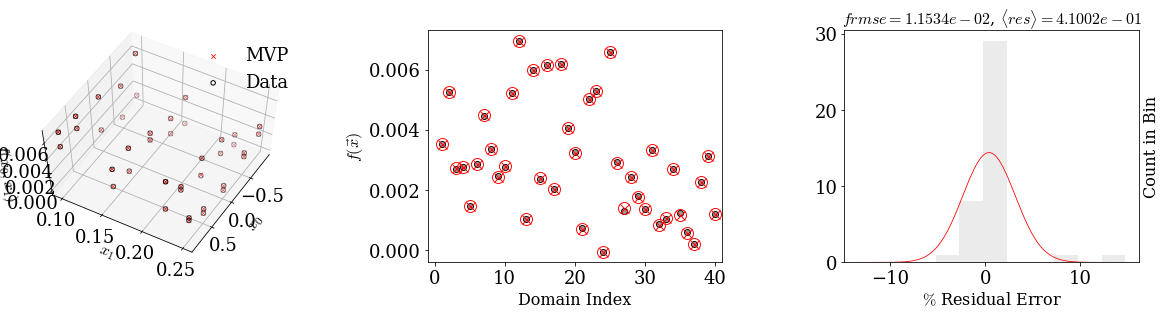

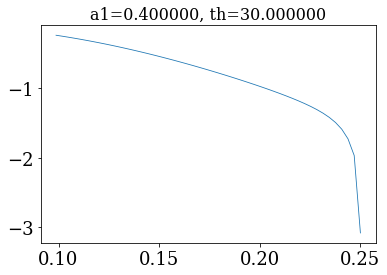

In [152]:
#
k = 'nu6'

#
eta_space = linspace( *lim(eta) )

foo[k].plot()

#
for a1 in a1_set:
    for th in theta_set:
        
        #
        et_ = eta_space
        u_ = cos( th )*ones_like(et_) 
        a1_ = a1*ones_like(et_)
        
        #
        xs_,xp = parama_party(et_,th_,a1_)
        
        
        #
        dom_ = array([u_,et_,xs_,xp]).T
        
        print th
        print foo[k].domain[:,0]
        
        figure()
        title('a1=%f, th=%f'%(a1,th*180/pi))
        plot( et_, foo[k].eval(dom_) )
        
        break
    break
        

In [110]:

# # Plot fits 

# for k in foo:
#     if ('mu' in k)or('nu' in k):
#         # Generate plot
#         labels={'python':[k,('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':[k,(r'\cos(\theta)', r'\eta', r'\chi_s', r'\chi_p'),'']}
#         fig = foo[k].plot(labels=labels,size_scale=1.2)
#         # Save figure 
#         figure_path = datadir + k+'_fit_diagnostic.pdf'
#         savefig( figure_path, pad_inches=0 )
        
        

In [332]:

# Plot fits and get code strings

code_string = ['\n\n#\ndef generate_model_params(theta,eta,chi_eff,chi_p):\n\n',
               '\t\'\'\'\n\tHola, soy un codigo escribido por codigo. ~londonl@mit.edu/pilondon2@gmail.com 2020\n\t\'\'\'  \n\n',
               '\t# Import usefuls\n',
               '\tfrom numpy import cos\n\n',
               '\t# Preliminaries\n',
               '\tu = cos(theta)\n','\tu2 = u*u\n', '\tu3 = u2*u\n', 
               '\tu3 = u2*u\n', '\teta2 = eta*eta\n', '\teta3 = eta2*eta\n', 
               '\tchi_eff2 = chi_eff*chi_eff\n', '\tchi_eff3 = chi_eff2*chi_eff\n', 
               '\tchi_p2 = chi_p*chi_p\n', 
               '\tchi_p3 = chi_p2*chi_p\n\n' 
              ]

# determine list of fitted variables and sort
fit_var = sort( [ k for k in foo.keys() if ('mu' in k)or('nu' in k) ] )

#
for k in fit_var:
    
    # Store python code for fit
    code_string.append( '\t# %s\n'%k )

    #
    this_code_string = foo[k].__str_python__()
    this_code_string = this_code_string.replace('chi_p*chi_p','chi_p2')
    this_code_string = this_code_string.replace('chi_p2*chi_p','chi_p3')
    this_code_string = this_code_string.replace('u*u','u2')
    this_code_string = this_code_string.replace('u2*u','u3')
    this_code_string = this_code_string.replace('chi_eff*chi_eff','chi_eff2')
    this_code_string = this_code_string.replace('chi_eff2*chi_eff','chi_eff3')
    this_code_string = this_code_string.replace('eta*eta','eta2')
    this_code_string = this_code_string.replace('eta2*eta','eta3')

    #
    code_string.append( '\t'+this_code_string+'\n\n' )
        
#
code_string.append( '\t#\n' )
code_string.append( '\treturn %s\n'%(','.join(fit_var)) )

In [333]:

# Write fit equations to file 

code_path = datadir+'parameter_space_fits.py'
f = open(code_path,'w+')

f.writelines(code_string)


In [334]:
f.close()